In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets

import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
# My model
import DenseNet as dn
import torch.optim as optim

In [3]:
# Hyper Parameters
EPOCH = 1
# train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 10
LR = 0.001              # learning rate
DOWNLOAD_MNIST = True   # set to False if you have downloaded


In [4]:
#Normalize with the grayscale channel's mean and var
#https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457

trainTransform = transforms.Compose([
    transforms.RandomCrop(28, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
    
testTransform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


In [5]:
import DenseNet as dn

In [6]:

# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=trainTransform,    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)


# torchvision.datasets.MNIST(root='/home/ubuntu/notebooks/mnist', train=True)
test_data = torchvision.datasets.MNIST(
    root='./mnist/', 
    train=False,
    transform = testTransform)

torch.Size([60000, 28, 28])
torch.Size([60000])


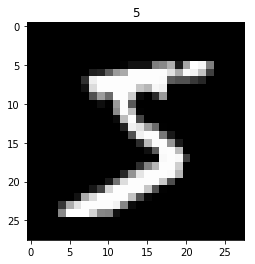

In [7]:
# plot one example
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [15]:


# convert test data into Variable, pick 2000 samples to speed up testing
# test_data = torchvision.datasets.MNIST(root='./mnist/', train=False,transform=testTransform)

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = DataLoader(
    dataset=train_data, 
    batch_size=BATCH_SIZE, 
    shuffle=True)

testLoader = DataLoader(
        dataset=test_data,
        batch_size=BATCH_SIZE, 
        shuffle=False)

In [9]:
# https://discuss.pytorch.org/t/feedback-on-pytorch-for-kaggle-competitions/2252/4

In [10]:
model = dn.DenseNet(num_init_features=10)

In [11]:
print model

DenseNet (
  (features): Sequential (
    (conv0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (norm0): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True)
    (relu0): ReLU (inplace)
    (denseblock1): _DenseBlock (
      (denselayer1): _DenseLayer (
        (norm.1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True)
        (relu.1): ReLU (inplace)
        (conv.1): Conv2d(10, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm.2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
        (conv.2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer (
        (norm.1): BatchNorm2d(14, eps=1e-05, momentum=0.1, affine=True)
        (relu.1): ReLU (inplace)
        (conv.1): Conv2d(14, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm.2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
        (conv.2): Conv2d(16, 4, kernel_size=(3, 3), strid

In [12]:
# Hyper Parameters
EPOCH = 1
# train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate
optimizer = optim.SGD(model.parameters(), lr=LR,
                            momentum=0.9, weight_decay=1e-4)

In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # divide batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = model(b_x)               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, step * len(b_x), len(train_loader.dataset),
            100. * step / len(train_loader), loss.data[0]))

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.325125
Train Epoch: 0 [100/60000 (0%)]	Loss: 2.245820
Train Epoch: 0 [200/60000 (0%)]	Loss: 2.179801
Train Epoch: 0 [300/60000 (0%)]	Loss: 2.255246
Train Epoch: 0 [400/60000 (1%)]	Loss: 2.120733
Train Epoch: 0 [500/60000 (1%)]	Loss: 2.163141
Train Epoch: 0 [600/60000 (1%)]	Loss: 2.027833
Train Epoch: 0 [700/60000 (1%)]	Loss: 2.003646
Train Epoch: 0 [800/60000 (1%)]	Loss: 1.876076
Train Epoch: 0 [900/60000 (2%)]	Loss: 1.865627
Train Epoch: 0 [1000/60000 (2%)]	Loss: 1.762607
Train Epoch: 0 [1100/60000 (2%)]	Loss: 1.958474
Train Epoch: 0 [1200/60000 (2%)]	Loss: 1.869174
Train Epoch: 0 [1300/60000 (2%)]	Loss: 1.808599
Train Epoch: 0 [1400/60000 (2%)]	Loss: 1.734255
Train Epoch: 0 [1500/60000 (2%)]	Loss: 1.657212
Train Epoch: 0 [1600/60000 (3%)]	Loss: 1.564868
Train Epoch: 0 [1700/60000 (3%)]	Loss: 1.633721
Train Epoch: 0 [1800/60000 (3%)]	Loss: 1.592878
Train Epoch: 0 [1900/60000 (3%)]	Loss: 1.666539
Train Epoch: 0 [2000/60000 (3%)]	Loss: 1.321927
Trai

Train Epoch: 0 [16800/60000 (28%)]	Loss: 0.369903
Train Epoch: 0 [16900/60000 (28%)]	Loss: 0.194702
Train Epoch: 0 [17000/60000 (28%)]	Loss: 0.591316
Train Epoch: 0 [17100/60000 (28%)]	Loss: 0.181977
Train Epoch: 0 [17200/60000 (29%)]	Loss: 0.251853
Train Epoch: 0 [17300/60000 (29%)]	Loss: 0.118936
Train Epoch: 0 [17400/60000 (29%)]	Loss: 0.171325
Train Epoch: 0 [17500/60000 (29%)]	Loss: 0.507318
Train Epoch: 0 [17600/60000 (29%)]	Loss: 0.162596
Train Epoch: 0 [17700/60000 (30%)]	Loss: 0.236774
Train Epoch: 0 [17800/60000 (30%)]	Loss: 0.084678
Train Epoch: 0 [17900/60000 (30%)]	Loss: 0.410082
Train Epoch: 0 [18000/60000 (30%)]	Loss: 0.098930
Train Epoch: 0 [18100/60000 (30%)]	Loss: 0.237558
Train Epoch: 0 [18200/60000 (30%)]	Loss: 0.174550
Train Epoch: 0 [18300/60000 (30%)]	Loss: 0.144266
Train Epoch: 0 [18400/60000 (31%)]	Loss: 0.091088
Train Epoch: 0 [18500/60000 (31%)]	Loss: 0.310711
Train Epoch: 0 [18600/60000 (31%)]	Loss: 0.130161
Train Epoch: 0 [18700/60000 (31%)]	Loss: 0.219356


Train Epoch: 0 [33200/60000 (55%)]	Loss: 0.039012
Train Epoch: 0 [33300/60000 (56%)]	Loss: 0.111756
Train Epoch: 0 [33400/60000 (56%)]	Loss: 0.099388
Train Epoch: 0 [33500/60000 (56%)]	Loss: 0.111482
Train Epoch: 0 [33600/60000 (56%)]	Loss: 0.065368
Train Epoch: 0 [33700/60000 (56%)]	Loss: 0.474396
Train Epoch: 0 [33800/60000 (56%)]	Loss: 0.078498
Train Epoch: 0 [33900/60000 (56%)]	Loss: 0.437569
Train Epoch: 0 [34000/60000 (57%)]	Loss: 0.214468
Train Epoch: 0 [34100/60000 (57%)]	Loss: 0.032019
Train Epoch: 0 [34200/60000 (57%)]	Loss: 0.279226
Train Epoch: 0 [34300/60000 (57%)]	Loss: 0.318686
Train Epoch: 0 [34400/60000 (57%)]	Loss: 0.252998
Train Epoch: 0 [34500/60000 (58%)]	Loss: 0.181469
Train Epoch: 0 [34600/60000 (58%)]	Loss: 0.066154
Train Epoch: 0 [34700/60000 (58%)]	Loss: 0.415548
Train Epoch: 0 [34800/60000 (58%)]	Loss: 0.319727
Train Epoch: 0 [34900/60000 (58%)]	Loss: 1.012954
Train Epoch: 0 [35000/60000 (58%)]	Loss: 0.194944
Train Epoch: 0 [35100/60000 (58%)]	Loss: 0.230481


Train Epoch: 0 [49600/60000 (83%)]	Loss: 0.025306
Train Epoch: 0 [49700/60000 (83%)]	Loss: 0.063864
Train Epoch: 0 [49800/60000 (83%)]	Loss: 0.047181
Train Epoch: 0 [49900/60000 (83%)]	Loss: 0.512740
Train Epoch: 0 [50000/60000 (83%)]	Loss: 0.049323
Train Epoch: 0 [50100/60000 (84%)]	Loss: 0.014716
Train Epoch: 0 [50200/60000 (84%)]	Loss: 0.137178
Train Epoch: 0 [50300/60000 (84%)]	Loss: 0.146568
Train Epoch: 0 [50400/60000 (84%)]	Loss: 0.317670
Train Epoch: 0 [50500/60000 (84%)]	Loss: 0.105027
Train Epoch: 0 [50600/60000 (84%)]	Loss: 0.181544
Train Epoch: 0 [50700/60000 (84%)]	Loss: 0.102834
Train Epoch: 0 [50800/60000 (85%)]	Loss: 0.881015
Train Epoch: 0 [50900/60000 (85%)]	Loss: 0.226693
Train Epoch: 0 [51000/60000 (85%)]	Loss: 0.029441
Train Epoch: 0 [51100/60000 (85%)]	Loss: 0.031441
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.250143
Train Epoch: 0 [51300/60000 (86%)]	Loss: 0.119239
Train Epoch: 0 [51400/60000 (86%)]	Loss: 0.425060
Train Epoch: 0 [51500/60000 (86%)]	Loss: 0.117159


In [17]:
model.eval()
test_loss = 0
correct = 0
for data, target in testLoader:
    data, target = Variable(data, volatile=True), Variable(target)
    output = model(data)
    test_loss += loss_func(output, target).data[0]
    pred = output.data.max(1)[1] # get the index of the max log-probability
    correct += pred.eq(target.data).cpu().sum()

test_loss = test_loss
test_loss /= len(testLoader) # loss function already averages over batch size
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(testLoader.dataset),
    100. * correct / len(testLoader.dataset)))


Test set: Average loss: 0.0802, Accuracy: 9757/10000 (98%)



In [26]:
def plot_kernels(tensor, num_cols=3):

    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i][0],cmap='gray')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
  

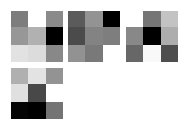

In [98]:
mm= model.double()
filters = mm.modules
body_model = [i for i in mm.children()]
body_model = body_model[0][3][3][4]
layer1 = body_model
tensor = layer1.weight.data.numpy()
plot_kernels(tensor)

In [64]:
body_model = [i for i in mm.children()]

In [76]:
c = 0
for i in body_model[0]:
    c+=1
    print i

Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True)
ReLU (inplace)
_DenseBlock (
  (denselayer1): _DenseLayer (
    (norm.1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True)
    (relu.1): ReLU (inplace)
    (conv.1): Conv2d(10, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (norm.2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
    (conv.2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (denselayer2): _DenseLayer (
    (norm.1): BatchNorm2d(14, eps=1e-05, momentum=0.1, affine=True)
    (relu.1): ReLU (inplace)
    (conv.1): Conv2d(14, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (norm.2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
    (conv.2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (denselayer3): _DenseLayer (
    (norm.1): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True)
    (re

In [97]:
body_model[0][3][3][4]

Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)